# Pair Programming Preprocesado

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

Usando el mismo dataset que usatéis ayer, los objetivos de los ejercicios de hoy son:

- Estandarizar las variables numéricas de vuestro set de datos
- Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.
- Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.
- Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

Happy coding 📊📈📉

In [78]:
df_menores = pd.read_csv("../regresion_logistica/ficheros/loan_limpio_menores.csv")
df_menores.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,credit_history,property_area,loan_status,loan_plazo
0,Male,No,0,Graduate,No,5849,0.0,128.0,1.0,Urban,Y,largo
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N,largo
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y,largo
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y,largo
4,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y,largo


In [79]:
# guardamos una copia del df sin estandarizar

df = df_menores.copy()

### Estanzarización

In [80]:
scaler = StandardScaler()

In [81]:
numericas = df.select_dtypes(include=np.number)
numericas.head(2)

,dependents,applicantincome,coapplicantincome,loanamount,credit_history
0,0,5849,0.0,128.0,1.0
1,1,4583,1508.0,128.0,1.0


In [82]:
numericas = numericas.drop(["credit_history","dependents"], axis=1)

In [83]:
scaler.fit(numericas)

StandardScaler()

In [84]:
x_escaladas = scaler.transform(numericas)
numericas_estandar = pd.DataFrame(x_escaladas,columns = numericas.columns)
numericas_estandar.head()

,applicantincome,coapplicantincome,loanamount
0,0.311983,-0.613757,-0.181121
1,-0.079844,-0.025836,-0.181121
2,-0.569782,-0.613757,-1.021461
3,-0.698843,0.305552,-0.289552
4,0.358718,-0.613757,-0.004921


In [85]:
df.drop(["applicantincome", "coapplicantincome", "loanamount"], axis = 1, inplace= True)
df.head()

,gender,married,dependents,education,self_employed,credit_history,property_area,loan_status,loan_plazo
0,Male,No,0,Graduate,No,1.0,Urban,Y,largo
1,Male,Yes,1,Graduate,No,1.0,Rural,N,largo
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,largo
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,largo
4,Male,No,0,Graduate,No,1.0,Urban,Y,largo


In [86]:
df = pd.concat([df, numericas_estandar], axis=1)
df.head()

,gender,married,dependents,education,self_employed,credit_history,property_area,loan_status,loan_plazo,applicantincome,coapplicantincome,loanamount
0,Male,No,0,Graduate,No,1.0,Urban,Y,largo,0.311983,-0.613757,-0.181121
1,Male,Yes,1,Graduate,No,1.0,Rural,N,largo,-0.079844,-0.025836,-0.181121
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,largo,-0.569782,-0.613757,-1.021461
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,largo,-0.698843,0.305552,-0.289552
4,Male,No,0,Graduate,No,1.0,Urban,Y,largo,0.358718,-0.613757,-0.004921


### Codificación

In [87]:
for col in df.select_dtypes(include = "O"):
    print(f"{col} ---->  {df[col].value_counts()}")

gender ---->  Male      413
Female     91
Name: gender, dtype: int64
married ---->  Yes    326
No     178
Name: married, dtype: int64
education ---->  Graduate        394
Not Graduate    110
Name: education, dtype: int64
self_employed ---->  No     435
Yes     69
Name: self_employed, dtype: int64
property_area ---->  Semiurban    193
Urban        165
Rural        146
Name: property_area, dtype: int64
loan_status ---->  Y    344
N    160
Name: loan_status, dtype: int64
loan_plazo ---->  largo    455
medio     42
corto      5
Name: loan_plazo, dtype: int64


No tienen orden: *gender*, *married*, *property_area*

Tienen orden: *education*, *loan_plazo*, *self_employed*, *dependents*

Para las columnas que tienen orden les vamos a dar los siguientes valores con el método *map*:

- education: Graduate 2, Not Graduate 1
- loan_pazo: largo 3, medio 2, corto 1
- self_employed: Yes -> 1, No 2
- dependents: 0 -> 3, 1,2 -> 2, 3-> 1

In [88]:
mapa_edu = {"Graduate": 2, "Not Graduate": 1}

In [89]:
df["education_encoding"] = df["education"].map(mapa_edu)

In [90]:
mapa_plazo = {"medio": 2, "corto": 1, "largo": 3}

In [91]:
df["plazo_encoding"] = df["loan_plazo"].map(mapa_plazo)

In [92]:
mapa_employed = {"Yes": 1, "No":2}

In [93]:
df["self_emp_encoding"] = df["self_employed"].map(mapa_employed)

In [94]:
mapa_depen = {0 : 3, 1: 2, 2: 2, 3:1}

In [95]:
df["dependents_encod"] = df["dependents"].map(mapa_depen)

Para las columnas que no tienen orden optamos por el método *get_dummies*

In [96]:
lista_columnas = ["gender", "married", "property_area"]

df_encoded = pd.DataFrame()


for columna in lista_columnas:
    df_dummies = pd.get_dummies(df[columna], prefix_sep = "_", prefix = columna, dtype = int)

    df_encoded = pd.concat([df_encoded, df_dummies], axis = 1)

In [97]:
df_final = pd.concat([df,df_encoded], axis=1)
df_final.head()

,gender,married,dependents,education,self_employed,credit_history,property_area,loan_status,loan_plazo,applicantincome,...,plazo_encoding,self_emp_encoding,dependents_encod,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,Male,No,0,Graduate,No,1.0,Urban,Y,largo,0.311983,...,3.0,2,3,0,1,1,0,0,0,1
1,Male,Yes,1,Graduate,No,1.0,Rural,N,largo,-0.079844,...,3.0,2,2,0,1,0,1,1,0,0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,largo,-0.569782,...,3.0,1,3,0,1,0,1,0,0,1
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,largo,-0.698843,...,3.0,2,3,0,1,0,1,0,0,1
4,Male,No,0,Graduate,No,1.0,Urban,Y,largo,0.358718,...,3.0,2,3,0,1,1,0,0,0,1


In [98]:
# borramos las columnas que ya rtienen encoding

df_final.drop(["gender", "married", "property_area", "education", "loan_plazo", "self_employed", "dependents"], axis=1, inplace = True)

In [99]:
df_final.head()

,credit_history,loan_status,applicantincome,coapplicantincome,loanamount,education_encoding,plazo_encoding,self_emp_encoding,dependents_encod,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,1.0,Y,0.311983,-0.613757,-0.181121,2,3.0,2,3,0,1,1,0,0,0,1
1,1.0,N,-0.079844,-0.025836,-0.181121,2,3.0,2,2,0,1,0,1,1,0,0
2,1.0,Y,-0.569782,-0.613757,-1.021461,2,3.0,1,3,0,1,0,1,0,0,1
3,1.0,Y,-0.698843,0.305552,-0.289552,1,3.0,2,3,0,1,0,1,0,0,1
4,1.0,Y,0.358718,-0.613757,-0.004921,2,3.0,2,3,0,1,1,0,0,0,1


In [100]:
df_final.to_csv("../regresion_logistica/ficheros/loan_ecoding.csv", index = False)

### Comprobamos si nuestros datos están balanceados

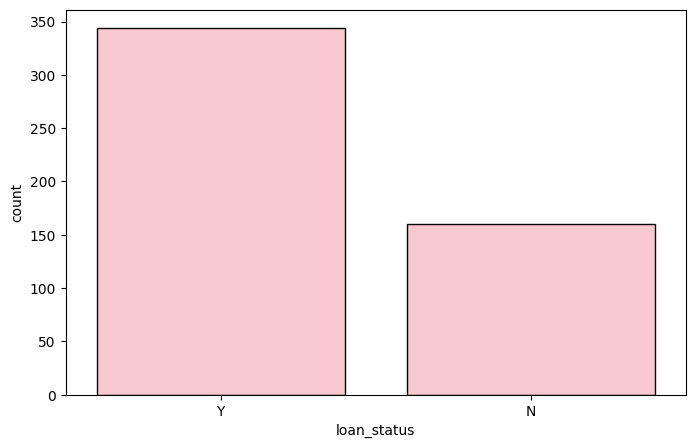

In [101]:
plt.figure(figsize=(8,5)) 
fig1 = sns.countplot(data = df_final, x = "loan_status",  color = "pink",  edgecolor='black')
fig1.set(xticklabels=["Y", "N"])
plt.show()

Vemos que hay muchos más que les conceden el crédito que denegados.

In [104]:
# desbalanceamos con SMOTE

y = df_final["loan_status"]
x = df_final.drop("loan_status", axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

In [110]:
df_final["plazo_encoding"].unique()

array([ 3.,  2.,  1., nan])

In [106]:
df_final.isnull().sum()

credit_history             0
loan_status                0
applicantincome            0
coapplicantincome          0
loanamount                 0
education_encoding         0
plazo_encoding             2
self_emp_encoding          0
dependents_encod           0
gender_Female              0
gender_Male                0
married_No                 0
married_Yes                0
property_area_Rural        0
property_area_Semiurban    0
property_area_Urban        0
dtype: int64

In [105]:
os_us = SMOTETomek()
x_train_res, y_train_res = os_us.fit_resample(x_train, y_train)


ValueError: Input X contains NaN.
SMOTETomek does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values